In [1]:
%pylab inline

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.python import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.transform as trf
from skimage import io
from skimage.color import rgb2gray
import time
import random
import scipy
import matplotlib
import glob
import os
import filetype

Populating the interactive namespace from numpy and matplotlib


# POREPOZNAVA NOT

## Poročilo

pripravil: Juš Osojnik

## Lastnosti podatkovne zbirke

* [vir](https://www.kaggle.com/kishanj/music-notes-datasets)
* 1000 slik za vsako kategorijo (celinke, polovinke, četertinke, osminke, šestnajstinke)
    * velikost **64x64** __Strong__
    * rgb
    
## Predobdelava

* slike pretvorimo v sivinske
* nad slikami opravimo normalizacijo

In [8]:
x_train, x_validate, x_test, y_train, y_validate, y_test = [], [], [], [], [], []

category = -2
for subdir, dirs, files in os.walk('datasets/training/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_train.append(rgb2gray(img))
            y_train.append([category])

category = -2
for subdir, dirs, files in os.walk('datasets/validation/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_validate.append(rgb2gray(img))
            y_validate.append([category])

category = -2
for subdir, dirs, files in os.walk('datasets/test/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_test.append(rgb2gray(img))
            y_test.append([category])

## Učni vzorci

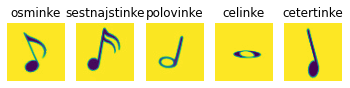

In [17]:
plt.figure()

plt.subplot(151)
plt.imshow(x_train[0])
plt.axis('off')
plt.title('osminke')

plt.subplot(152)
plt.imshow(x_train[750])
plt.axis('off')
plt.title('sestnajstinke');

plt.subplot(153)
plt.imshow(x_train[1500])
plt.axis('off')
plt.title('polovinke')

plt.subplot(154)
plt.imshow(x_train[2250])
plt.axis('off')
plt.title('celinke');

plt.subplot(155)
plt.imshow(x_train[3000])
plt.axis('off')
plt.title('cetertinke');

plt.show()

## Validacijski vzorci

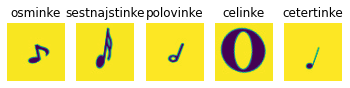

In [18]:
plt.figure()

plt.subplot(151)
plt.imshow(x_validate[0])
plt.axis('off')
plt.title('osminke')

plt.subplot(152)
plt.imshow(x_validate[150])
plt.axis('off')
plt.title('sestnajstinke');

plt.subplot(153)
plt.imshow(x_validate[300])
plt.axis('off')
plt.title('polovinke')

plt.subplot(154)
plt.imshow(x_validate[450])
plt.axis('off')
plt.title('celinke');

plt.subplot(155)
plt.imshow(x_validate[600])
plt.axis('off')
plt.title('cetertinke');

plt.show()

## Testni vzorci

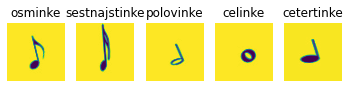

In [19]:
plt.figure()

plt.subplot(151)
plt.imshow(x_test[0])
plt.axis('off')
plt.title('osminke')

plt.subplot(152)
plt.imshow(x_test[150])
plt.axis('off')
plt.title('sestnajstinke');

plt.subplot(153)
plt.imshow(x_test[300])
plt.axis('off')
plt.title('polovinke')

plt.subplot(154)
plt.imshow(x_test[450])
plt.axis('off')
plt.title('celinke');

plt.subplot(155)
plt.imshow(x_test[600])
plt.axis('off')
plt.title('cetertinke');

plt.show()

## Učenje na originalnih podatkih

metoda: sequential, convolution, categorical_crossentropy

In [20]:
x_train, y_train, x_validate, y_validate, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validate), np.array(
    y_validate), np.array(x_test), np.array(y_test)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_validate = tf.keras.utils.normalize(x_validate, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
x_validate = x_validate.reshape(x_validate.shape[0], 64, 64, 1)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

y_train = to_categorical(y_train, 5)
y_validate = to_categorical(y_validate, 5)
y_test = to_categorical(y_test, 5)

kernel_size = 5

model = keras.Sequential()
model.add(keras.layers.Convolution2D(32, (kernel_size, kernel_size), activation='relu',
                                     input_shape=(64, 64, 1)))
model.add(keras.layers.Convolution2D(16, (kernel_size, kernel_size), activation='relu'))
model.add(keras.layers.Convolution2D(16, (kernel_size, kernel_size), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cbs = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1)
]

hist = model.fit(x_train, y_train, epochs=9001, validation_data=(x_validate, y_validate),
                 callbacks=cbs)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

2022-01-16 22:24:47.318879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-16 22:24:47.319044: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/9001
110/110 [==============================] - 9s 82ms/step - loss: 0.9657 - accuracy: 0.5991 - val_loss: 1.1073 - val_accuracy: 0.6640
Epoch 2/9001
110/110 [==============================] - 9s 85ms/step - loss: 0.3276 - accuracy: 0.8846 - val_loss: 0.6005 - val_accuracy: 0.8040
Epoch 3/9001
110/110 [==============================] - 9s 85ms/step - loss: 0.1462 - accuracy: 0.9537 - val_loss: 0.6678 - val_accuracy: 0.8027
Epoch 4/9001
110/110 [==============================] - 9s 86ms/step - loss: 0.0721 - accuracy: 0.9746 - val_loss: 0.5816 - val_accuracy: 0.8387
Epoch 5/9001
110/110 [==============================] - 10s 87ms/step - loss: 0.0534 - accuracy: 0.9846 - val_loss: 0.4245 - val_accuracy: 0.8653
Epoch 6/9001
110/110 [==============================] - 10s 88ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.4809 - val_accuracy: 0.8613
Epoch 7/9001
110/110 [==============================] - 10s 87ms/step - loss: 0.0325 - accuracy: 0.9886 - val_loss: 0.5704 - val

Epoch 1/9001
110/110 ============================== - 9s 78ms/step - loss: 0.8640 - accuracy: 0.6437 - val_loss: 0.8479 - val_accuracy: 0.7613
Epoch 2/9001
110/110 ============================== - 9s 81ms/step - loss: 0.2727 - accuracy: 0.9109 - val_loss: 0.9916 - val_accuracy: 0.7747
Epoch 3/9001
110/110 ============================== - 9s 82ms/step - loss: 0.1193 - accuracy: 0.9611 - val_loss: 0.6223 - val_accuracy: 0.8213
Epoch 4/9001
110/110 ============================== - 9s 83ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.3881 - val_accuracy: 0.8573
Epoch 5/9001
110/110 ============================== - 9s 86ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.5391 - val_accuracy: 0.8667
Epoch 6/9001
110/110 ============================== - 9s 86ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.4818 - val_accuracy: 0.8667
Epoch 00006: early stopping
24/24 ============================== - 0s 17ms/step - loss: 1.0544 - accuracy: 0.8373
Test accuracy: 0.8373333215713501

## Augmentacija učnih vzorcev

vsak vzorec je bil petdesetkrat naključno zarotiran, približan, flipan, distortiran

In [ ]:
import Augmentor

p = Augmentor.Pipeline('datasets-augmented/training/Notes')
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
p.flip_random(probability=0.3)
p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
for i in range(50):
    p.process()

p = Augmentor.Pipeline('datasets-augmented/test/Notes')
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
p.flip_random(probability=0.3)
p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
for i in range(50):
    p.process()

p = Augmentor.Pipeline('datasets-augmented/validation/Notes')
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
p.flip_random(probability=0.3)
p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
for i in range(50):
    p.process()

In [ ]:
x_train, x_validate, x_test, y_train, y_validate, y_test = [], [], [], [], [], []

category = -2
for subdir, dirs, files in os.walk('datasets-augmented/training/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_train.append(rgb2gray(img))
            y_train.append([category])

category = -2
for subdir, dirs, files in os.walk('datasets-augmented/validation/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_validate.append(rgb2gray(img))
            y_validate.append([category])

category = -2
for subdir, dirs, files in os.walk('datasets-augmented/test/Notes'):
    category += 1
    for file in files:
        if filetype.is_image(os.path.join(subdir, file)):
            img = io.imread(os.path.join(subdir, file))
            x_test.append(rgb2gray(img))
            y_test.append([category])

## Primer novih vzorcev

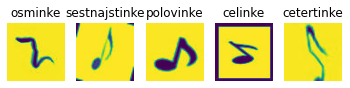

In [24]:
plt.figure()

plt.subplot(151)
plt.imshow(x_train[0])
plt.axis('off')
plt.title('osminke')

plt.subplot(152)
plt.imshow(x_train[750])
plt.axis('off')
plt.title('osminke');

plt.subplot(153)
plt.imshow(x_train[1500])
plt.axis('off')
plt.title('osminke')

plt.subplot(154)
plt.imshow(x_train[2250])
plt.axis('off')
plt.title('osminke');

plt.subplot(155)
plt.imshow(x_train[3000])
plt.axis('off')
plt.title('osminke');

plt.show()

## Učenje na augmentiranih podatkih

metoda: equential, convolution, categorical_crossentropy

In [ ]:
x_train, y_train, x_validate, y_validate, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validate), np.array(
    y_validate), np.array(x_test), np.array(y_test)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_validate = tf.keras.utils.normalize(x_validate, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
x_validate = x_validate.reshape(x_validate.shape[0], 64, 64, 1)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

y_train = to_categorical(y_train, 5)
y_validate = to_categorical(y_validate, 5)
y_test = to_categorical(y_test, 5)

kernel_size = 5

model = keras.Sequential()
model.add(keras.layers.Convolution2D(32, (kernel_size, kernel_size), activation='relu',
                                     input_shape=(64, 64, 1)))
model.add(keras.layers.Convolution2D(16, (kernel_size, kernel_size), activation='relu'))
model.add(keras.layers.Convolution2D(16, (kernel_size, kernel_size), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cbs = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1)
]

hist = model.fit(x_train, y_train, epochs=9001, validation_data=(x_validate, y_validate),
                 callbacks=cbs)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/9001
2335/5579 [===========>..................] - ETA: 4:27 - loss: 0.6392 - accuracy: 0.7648

Epoch 1/9001
5579/5579 ============================== - 766s 137ms/step - loss: 0.4752 - accuracy: 0.8286 - val_loss: 0.7723 - val_accuracy: 0.7559
Epoch 2/9001
5579/5579 ============================== - 490s 88ms/step - loss: 0.2431 - accuracy: 0.9186 - val_loss: 0.3645 - val_accuracy: 0.8701
Epoch 3/9001
5579/5579 ============================== - 467s 84ms/step - loss: 0.1669 - accuracy: 0.9440 - val_loss: 0.3107 - val_accuracy: 0.9002
Epoch 4/9001
5579/5579 ============================== - 467s 84ms/step - loss: 0.1296 - accuracy: 0.9572 - val_loss: 0.4794 - val_accuracy: 0.8486
Epoch 5/9001
5579/5579 ============================== - 466s 83ms/step - loss: 0.1075 - accuracy: 0.9645 - val_loss: 0.3355 - val_accuracy: 0.8966
Epoch 00005: early stopping
1196/1196 ============================== - 20s 16ms/step - loss: 0.2487 - accuracy: 0.9190
Test accuracy: 0.9190065264701843

## Zaključek

* Osnovni vzorci
    * unčni
        * acc: 0.8667
    * testni
        * acc: 0.8373333215713501
* Augmentirani vzorci
    * unčni
        * acc: 0.9190
    * testni
        * acc: 0.9190065264701843
        
Rezultati na testni zbirki so bili v primeru osnovnih vzorcev slabsi, ko pa je šlo za augmentirane podatke pa so bili zelo podobni. Prav tako je bil model naučen z augmentrianimi podatki bolj natančen skoraj za 9 odstotkov. Večja in bolj raznolika množica je pomagala pri boljšem učenju našega modela. 